In [0]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.preprocessing import StandardScaler
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_method=PCA(n_components =100)
print(lfw_dataset.target)
#print(lfw_dataset)

[2 3 1 ... 4 2 4]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


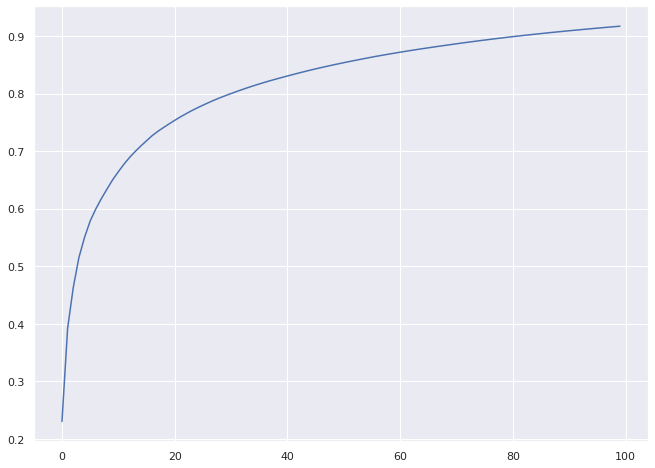

In [99]:
X=lfw_dataset.data
Y=lfw_dataset.target
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=32)
num_components=100
X_std=StandardScaler().fit_transform(X)
pca_method=PCA(n_components=num_components).fit(X_std)
#X_pca=PCA(n_components=num_components).fit_transform(X_std)
X_pca=pca_method.transform(X_std)

#print(X_pca.shape)
x_train_std=StandardScaler().fit_transform(x_train)
x_test_std=StandardScaler().fit_transform( x_test)


x_train_pca=pca_method.transform(x_train)
x_test_pca=pca_method.transform(x_test)
df=pd.DataFrame(data=X_pca)
df['target']=Y
df_1=df.loc[(df['target'].isin([0,1,2]))]
Y_1=df_1['target']
df_1.drop(['target'], axis = 1, inplace = True) 
#df_1
#print(Y_1)

plt.plot(np.cumsum(pca_method.explained_variance_ratio_))
#plt.show()

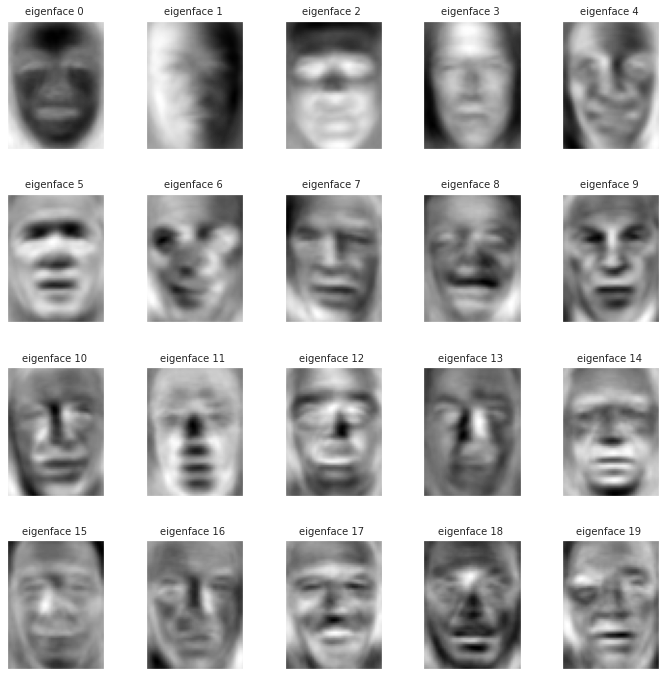

In [100]:
n_samples,height,width=lfw_dataset.images.shape

eigenfaces_data=pca_method.components_
eigenfaces_image=eigenfaces_data.reshape(num_components,height,width)


def plot_images(images, titles, height, width, n_rows, n_columns):
    #total_images=0
    plt.figure(figsize=(1.9 * n_columns, 2.5 * n_rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
   
    for i in range(n_rows*n_columns ):
      plt.subplot(n_rows, n_columns, i + 1)
      plt.imshow(images[i].reshape((height, width)),cmap=plt.cm.gray )
      plt.title(titles[i], size=10)
      plt.xticks(())
      plt.yticks(())



eigenface_titles=[]
for i in range(20):
  eigenface_titles.append("eigenface %d "% i)

plot_images(eigenfaces_image, eigenface_titles, height, width,4,5)
plt.show()


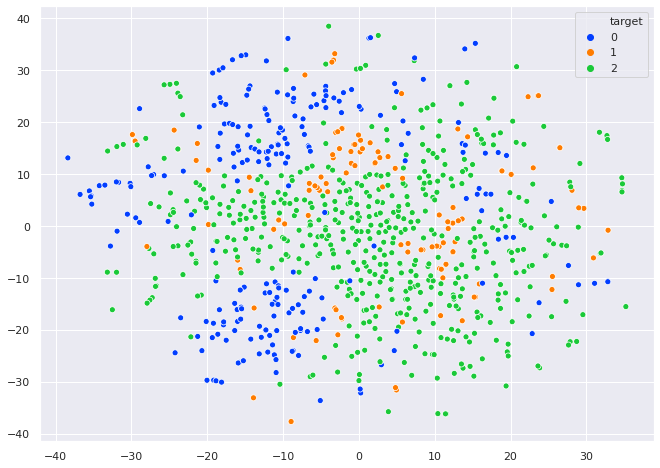

In [101]:
from sklearn.manifold import TSNE
import seaborn as sns

color_choice = sns.color_palette("bright", 3)
tsne = TSNE()
df_1=StandardScaler().fit_transform(df_1)
#X=StandardScaler().fit_transform(X)
X_tSNE = tsne.fit_transform(df_1)
sns.scatterplot(X_tSNE[:,0], X_tSNE[:,1], hue=Y_1, legend='full', palette=color_choice)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
kclf=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
kclf.fit(x_train_pca,y_train)
y_pred=kclf.predict(x_test_pca)
confusion_matrix(y_test, y_pred)
target_names=['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder' ,'Tony Blair']

print(classification_report(y_test,y_pred,target_names=target_names))


                   precision    recall  f1-score   support

     Colin Powell       0.59      0.66      0.62        64
  Donald Rumsfeld       0.39      0.41      0.40        29
    George W Bush       0.76      0.79      0.77       161
Gerhard Schroeder       0.65      0.30      0.41        37
       Tony Blair       0.47      0.51      0.49        51

         accuracy                           0.64       342
        macro avg       0.57      0.53      0.54       342
     weighted avg       0.64      0.64      0.63       342



In [103]:
pca_variance=PCA(0.80).fit(X_std)
x_train_pca_variance=pca_variance.transform(x_train)
x_test_pca_variance=pca_variance.transform(x_test)
kclf_1=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
kclf_1.fit(x_train_pca_variance,y_train)
y_pred_1=kclf_1.predict(x_test_pca_variance)
confusion_matrix(y_test, y_pred_1)
target_names=['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder' ,'Tony Blair']

print(classification_report(y_test,y_pred_1,target_names=target_names))
print(pca_variance.n_components_)

                   precision    recall  f1-score   support

     Colin Powell       0.49      0.66      0.56        64
  Donald Rumsfeld       0.39      0.41      0.40        29
    George W Bush       0.73      0.71      0.72       161
Gerhard Schroeder       0.56      0.27      0.36        37
       Tony Blair       0.46      0.45      0.46        51

         accuracy                           0.59       342
        macro avg       0.52      0.50      0.50       342
     weighted avg       0.59      0.59      0.58       342

31


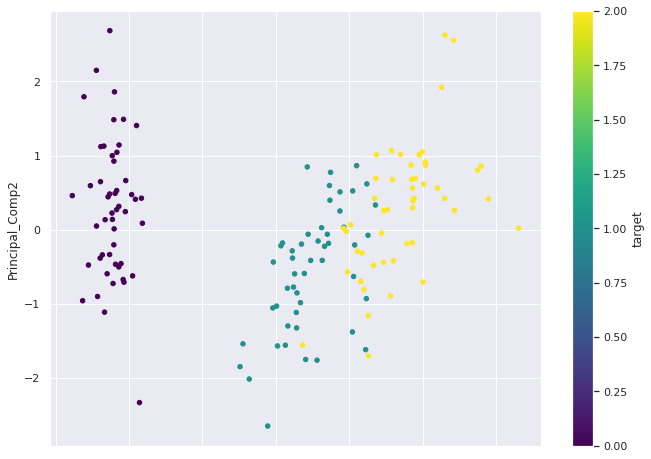

In [104]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
myData=load_iris()
x_iris= myData.data
y_iris=myData.target
target_names=myData.target_names
pca_iris=PCA(n_components =2)
x_std=StandardScaler().fit_transform( x_iris)
pca_components_iris=pca_iris.fit_transform(x_std)
pca_df_iris=pd.DataFrame(data=pca_components_iris , columns=['Principal_Comp1' , 'Principal_Comp2'])
pca_df_iris['target']=myData.target
pca_df_iris.plot.scatter(x='Principal_Comp1',y='Principal_Comp2',c='target',colormap='viridis')





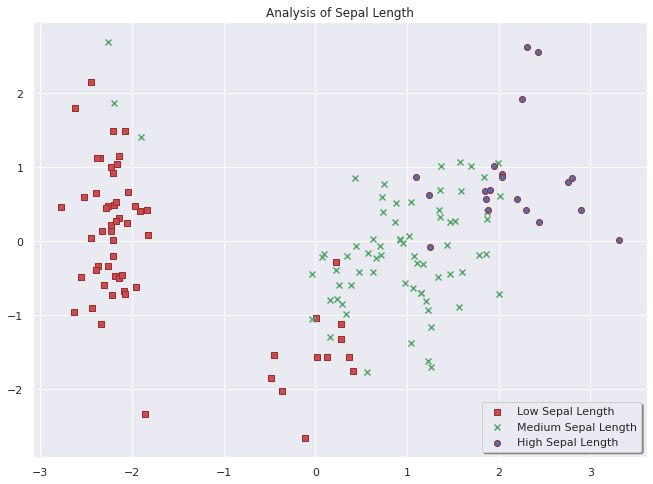

In [105]:
#Analysing relationship with Sepal Length and PCA_COMP1 and PCA_COMP2
min_len=x_iris[:,0].min()
max_len=x_iris[:,0].max()
mark=(max_len - min_len)/3
y_mark=[]
for i in x_iris[:,0]:
  if (i<= min_len+mark):
    y_mark.append(0)
  elif (i<=min_len+mark+mark):
    y_mark.append(1)
  else:
    y_mark.append(2)
#print(y_mark)
power_sepal_len=['Low Sepal Length' , 'Medium Sepal Length' ,'High Sepal Length']
for i,c,m,target_name in zip(np.unique(y_mark),['r','g','b'],['s','x','o'],power_sepal_len):
    plt.scatter(pca_components_iris[y_mark==i,0], pca_components_iris[y_mark==i,1],c=c, marker=m, label=target_name,edgecolors='brown')
#x_points=np.linspace(-10,10,20)
plt.legend(loc='best',shadow=True)
plt.title('Analysis of Sepal Length')
plt.show()

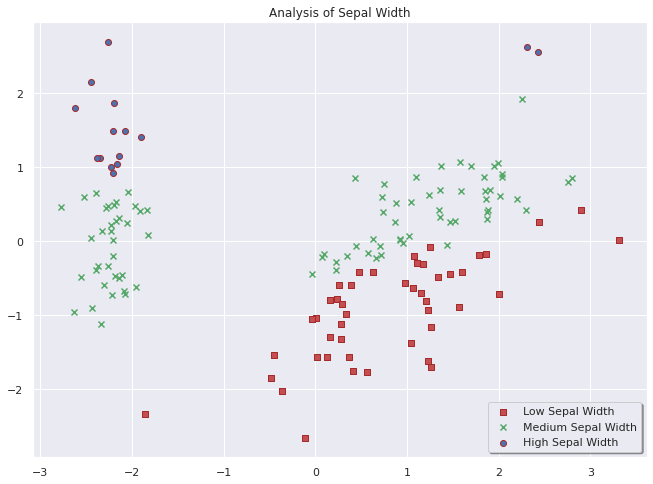

In [106]:
#Analysing relationship with Sepal Width and PCA_COMP1 and PCA_COMP2
min_len=x_iris[:,1].min()
max_len=x_iris[:,1].max()
mark=(max_len - min_len)/3
y_mark=[]
for i in x_iris[:,1]:
  if (i<= min_len+mark):
    y_mark.append(0)
  elif (i<=min_len+mark+mark):
    y_mark.append(1)
  else:
    y_mark.append(2)
#print(y_mark)
power_sepal_wid=['Low Sepal Width' , 'Medium Sepal Width' ,'High Sepal Width']
for i,c,m,target_name in zip(np.unique(y_mark),['r','g','b'],['s','x','o'],power_sepal_wid):
    plt.scatter(pca_components_iris[y_mark==i,0], pca_components_iris[y_mark==i,1],c=c, marker=m, label=target_name,edgecolors='brown')
#x_points=np.linspace(-10,10,20)
plt.legend(loc='best',shadow=True)
plt.title('Analysis of Sepal Width')
plt.show()

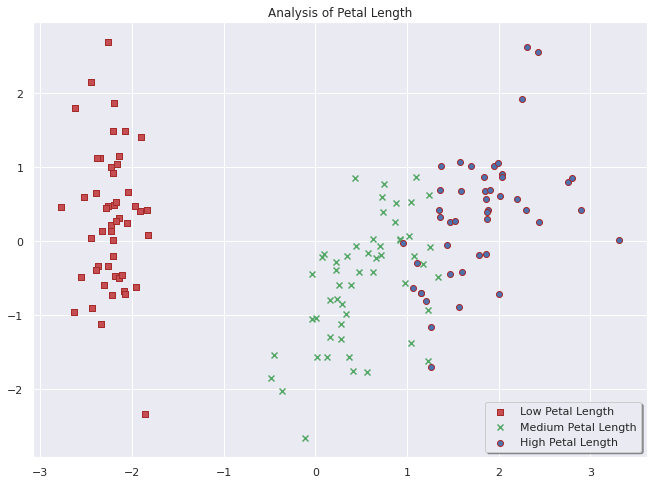

In [107]:
#Analysing relationship with Petal Length and PCA_COMP1 and PCA_COMP2
min_len=x_iris[:,2].min()
max_len=x_iris[:,2].max()
mark=(max_len - min_len)/3
y_mark=[]
for i in x_iris[:,2]:
  if (i<= min_len+mark):
    y_mark.append(0)
  elif (i<=min_len+mark+mark):
    y_mark.append(1)
  else:
    y_mark.append(2)
#print(y_mark)
power_petal_len=['Low Petal Length' , 'Medium Petal Length' ,'High Petal Length']
for i,c,m,target_name in zip(np.unique(y_mark),['r','g','b'],['s','x','o'],power_petal_len):
    plt.scatter(pca_components_iris[y_mark==i,0], pca_components_iris[y_mark==i,1],c=c, marker=m, label=target_name,edgecolors='brown')
#x_points=np.linspace(-10,10,20)
plt.legend(loc='best',shadow=True)
plt.title('Analysis of Petal Length')
plt.show()

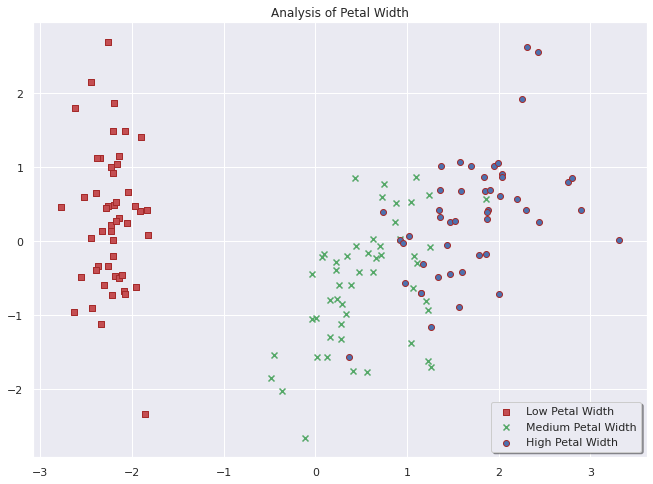

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [108]:
#Analysing relationship with Petal Width and PCA_COMP1 and PCA_COMP2
min_len=x_iris[:,3].min()
max_len=x_iris[:,3].max()
mark=(max_len - min_len)/3
y_mark=[]
for i in x_iris[:,3]:
  if (i<= min_len+mark):
    y_mark.append(0)
  elif (i<=min_len+mark+mark):
    y_mark.append(1)
  else:
    y_mark.append(2)
#print(y_mark)
power_petal_wid=['Low Petal Width' , 'Medium Petal Width' ,'High Petal Width']
for i,c,m,target_name in zip(np.unique(y_mark),['r','g','b'],['s','x','o'],power_petal_wid):
    plt.scatter(pca_components_iris[y_mark==i,0], pca_components_iris[y_mark==i,1],c=c, marker=m, label=target_name,edgecolors='brown')
#x_points=np.linspace(-10,10,20)
plt.legend(loc='best',shadow=True)
plt.title('Analysis of Petal Width')
plt.show()
myData.target_names

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


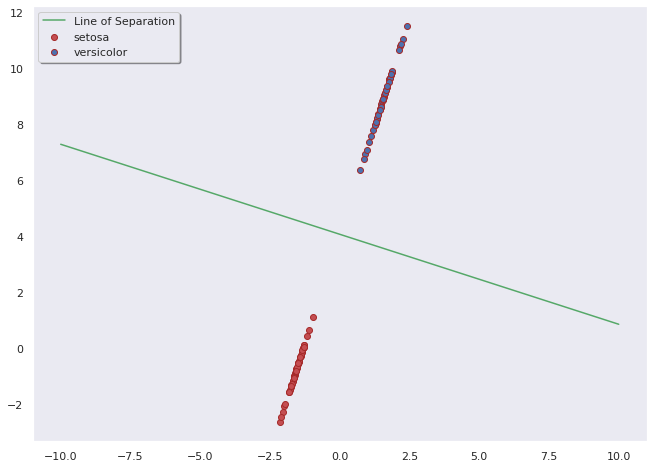

In [109]:
#LDA Implementation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math
df_iris=pd.DataFrame(data=x_std)
df_iris['target']=myData.target
df_new=df_iris.loc[(df_iris['target'].isin([0,1]))]
y_new=df_new['target']
df_new.drop(['target'], axis = 1, inplace = True)
lda_method=LinearDiscriminantAnalysis(n_components=1)
lda_method1=lda_method.fit(df_new,y_new)
x_new = lda_method1.transform(df_new)
c, a, b = lda_method.intercept_, lda_method.coef_[0][0], lda_method.coef_[0][1]
m1=b/a;
m1=1+((b/a)*(b/a))
m1=math.sqrt(m1)
m1=1/m1
m2=1-(m1*m1)
m2=math.sqrt(m2)
x_cord=[]
y_cord=[]
len=x_new.shape[0]
mean=0
for i in range(0,len):
  distance=x_new[i][0]
  mean=mean+(distance/len)

mean_y=-1*((c/b)+mean*(a/b))
for i in range(0,len):
  distance=x_new[i][0]
  x_cord.append(distance*m1+mean)
  y_cord.append(distance*m2+mean_y)

x_min=min(x_cord)-1
x_max=max(x_cord)+1
y_min=min(y_cord)-1
y_max=max(y_cord)+1
classes_name=['setosa', 'versicolor']
x_points=np.linspace(-10,10,20)
y_points=-1*((c/b)+x_points*(a/b))
plt.plot(x_points, y_points, '-g', label='Line of Separation')
com_list=np.c_[x_cord,y_cord]
com_list=np.asarray(com_list)
#plt.scatter(x_cord,y_cord,c=y_new, cmap=matplotlib.colors.ListedColormap(colors))
for i,c,target_name in zip(np.unique(y_new),['r','b'],classes_name):
    plt.scatter(com_list[y_new==i,0], com_list[y_new==i,1],c=c, label=target_name,edgecolor='brown')
plt.legend(loc='upper left',shadow='True')
plt.grid()
#plt.xlim(x_min,x_max)
#plt.ylim(y_min,y_max)
plt.show()

               


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


-0.9999999999999999


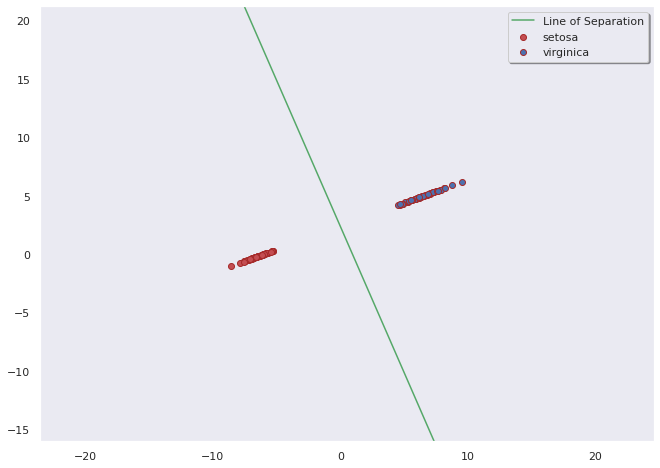

2.503775714724432


In [110]:
df_new=df_iris.loc[(df_iris['target'].isin([0,2]))]
y_new=df_new['target']
df_new.drop(['target'], axis = 1, inplace = True)
lda_method=LinearDiscriminantAnalysis(n_components=1)
lda_method1=lda_method.fit(df_new,y_new)
x_new = lda_method1.transform(df_new)
c, a, b = lda_method1.intercept_, lda_method1.coef_[0][0], lda_method1.coef_[0][1]
m1=b/a;
m1=1+((b/a)*(b/a))
m1=math.sqrt(m1)
m1=1/m1
m2=1-(m1*m1)
m2=math.sqrt(m2)
print((-a/b)*(b/a))
x_cord=[]
y_cord=[]
len=x_new.shape[0]
mean=0
for i in range(0,len):
  distance=x_new[i][0]
  mean=mean+(distance/len)

mean_y=-1*((c/b)+mean*(a/b))
for i in range(0,len):
  distance=x_new[i][0]
  x_cord.append(distance*m1+mean)
  y_cord.append(distance*m2+mean_y)

x_min=min(x_cord)-15
x_max=max(x_cord)+15
y_min=min(y_cord)-15
y_max=max(y_cord)+15
classes_name=['setosa', 'virginica']
x_points=np.linspace(-10,10,20)
y_points=-1*((c/b)+x_points*((a/b)))
plt.plot(x_points, y_points, '-g', label='Line of Separation')
com_list=np.c_[x_cord,y_cord]
com_list=np.asarray(com_list)
#plt.scatter(x_cord,y_cord,c=y_new, cmap=matplotlib.colors.ListedColormap(colors))
for i,c,target_name in zip(np.unique(y_new),['r','b'],classes_name):
    plt.scatter(com_list[y_new==i,0], com_list[y_new==i,1],c=c, label=target_name,edgecolor='brown')
plt.legend(loc='best',shadow='True')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.grid()
plt.show()
print(a/b)

-0.9999999999999999


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


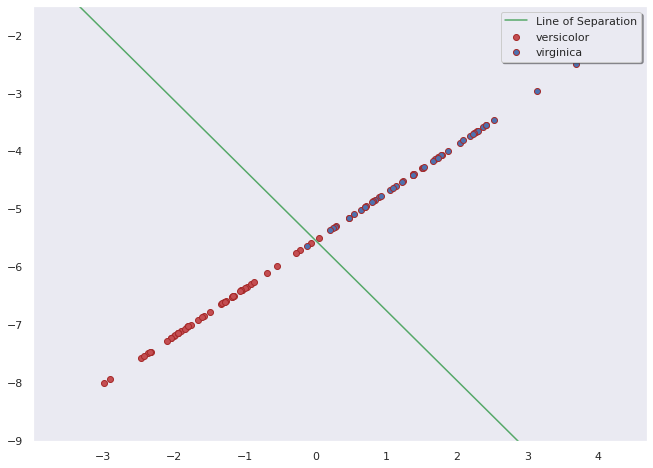

In [111]:
df_new=df_iris.loc[(df_iris['target'].isin([1,2]))]
y_new=df_new['target']
df_new.drop(['target'], axis = 1, inplace = True)
lda_method=LinearDiscriminantAnalysis(n_components=1)
lda_method1=lda_method.fit(df_new,y_new)
x_new = lda_method1.transform(df_new)
c, a, b = lda_method1.intercept_, lda_method1.coef_[0][0], lda_method1.coef_[0][1]
m1=b/a;
m1=1+((b/a)*(b/a))
m1=math.sqrt(m1)
m1=1/m1
m2=1-(m1*m1)
m2=math.sqrt(m2)
print((-a/b)*(b/a))
x_cord=[]
y_cord=[]
len=x_new.shape[0]
mean=0
for i in range(0,len):
  distance=x_new[i][0]
  mean=mean+(distance/len)

mean_y=-1*((c/b)+mean*(a/b))
for i in range(0,len):
  distance=x_new[i][0]
  x_cord.append(distance*m1+mean)
  y_cord.append(distance*m2+mean_y)

x_min=min(x_cord)-1
x_max=max(x_cord)+1
y_min=min(y_cord)-1
y_max=max(y_cord)+1


classes_name=['versicolor', 'virginica']
x_points=np.linspace(-10,10,20)
y_points=-1*((c/b)+x_points*(a/b))
plt.plot(x_points, y_points, '-g', label='Line of Separation')
com_list=np.c_[x_cord,y_cord]
com_list=np.asarray(com_list)
#plt.scatter(x_cord,y_cord,c=y_new, cmap=matplotlib.colors.ListedColormap(colors))
for i,c,target_name in zip(np.unique(y_new),['r','b'],classes_name):
    plt.scatter(com_list[y_new==i,0], com_list[y_new==i,1],c=c, label=target_name,edgecolor='brown')
plt.legend(loc='best',shadow='True')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.grid()
plt.show()

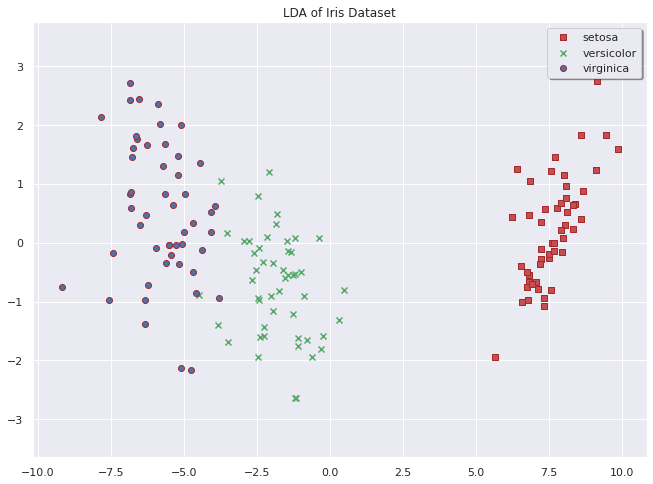

In [112]:
#Plotting LDA analysis for all three classes
df_new=df_iris.loc[(df_iris['target'].isin([0,1,2]))]
y_new=df_new['target']
df_new.drop(['target'], axis = 1, inplace = True)
lda_method=LinearDiscriminantAnalysis(n_components=2)
lda_method1=lda_method.fit(df_new,y_new)
x_new = lda_method1.transform(df_new)
x_min=x_new[:,0].min()-1
x_max=x_new[:,0].max()+1
y_min=x_new[:,1].min()-1
y_max=x_new[:,1].max()+1
for i,c,m,target_name in zip(np.unique(y_new),['r','g','b'],['s','x','o'],target_names):
    plt.scatter(x_new[y_new==i,0], x_new[y_new==i,1],c=c, marker=m, label=target_name,edgecolors='brown')
#x_points=np.linspace(-10,10,20)
plt.legend(loc='best',shadow=True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title('LDA of Iris Dataset')
#x_points=np.array([np.min(x_new[:,0], axis=0), np.max(x_new[:,0], axis=0)])
#for i, c in enumerate(['r','g','b']):
#    cc, aa, bb = lda_method1.intercept_[i], lda_method1.coef_[i][0], lda_method1.coef_[i][1]
#    y_points = -(cc+x_points*aa)/bb    
#    plt.plot(x_points,y_points,c=c)
plt.show()
               
                

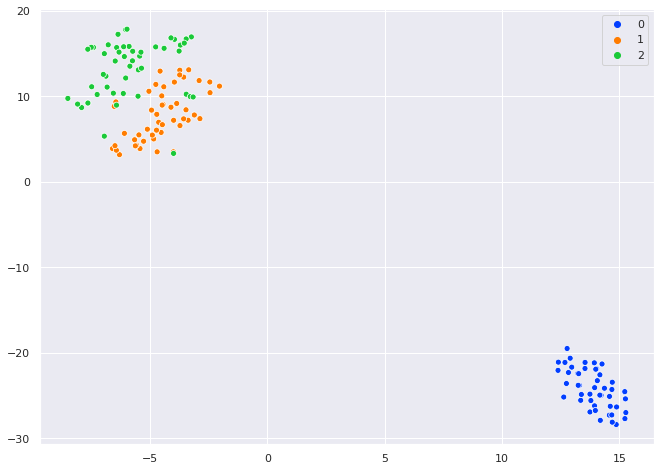

In [113]:
#sns.set(rc={'figure.figsize':(11,8)})
color_pattern = sns.color_palette("bright", 3)
tsne = TSNE(metric='euclidean')
X_tSNE = tsne.fit_transform(x_std)
sns.scatterplot(X_tSNE[:,0], X_tSNE[:,1], hue=y_iris, legend='full', palette=color_pattern)

#fig=plt.figure()
#tsne = TSNE(metric='euclidean')
#X_embedded = tsne.fit_transform(x_std)
#plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_iris,cmap='viridis')
#plt.show()



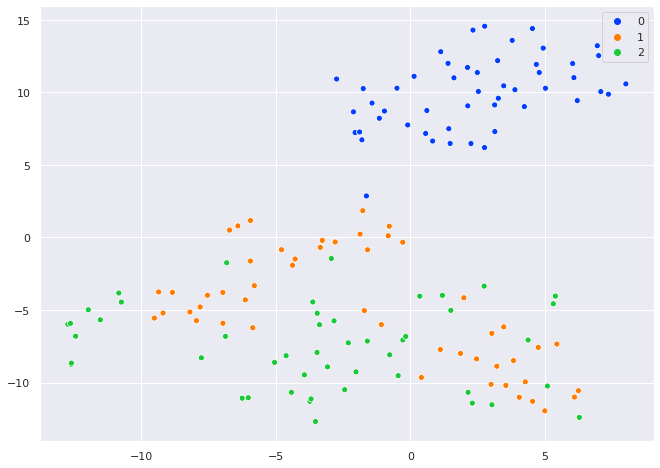

In [114]:
#sns.set(rc={'figure.figsize':(11,8)})
color_pattern = sns.color_palette("bright", 3)
tsne = TSNE(metric='mahalanobis')
X_tSNE = tsne.fit_transform(x_std)
sns.scatterplot(X_tSNE[:,0], X_tSNE[:,1], hue=y_iris, legend='full', palette=color_pattern)


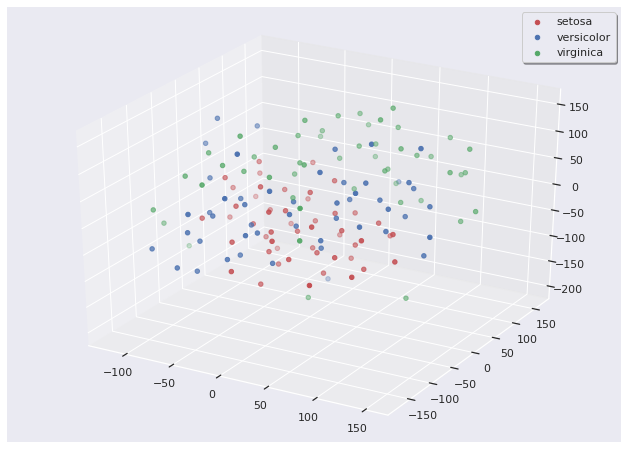

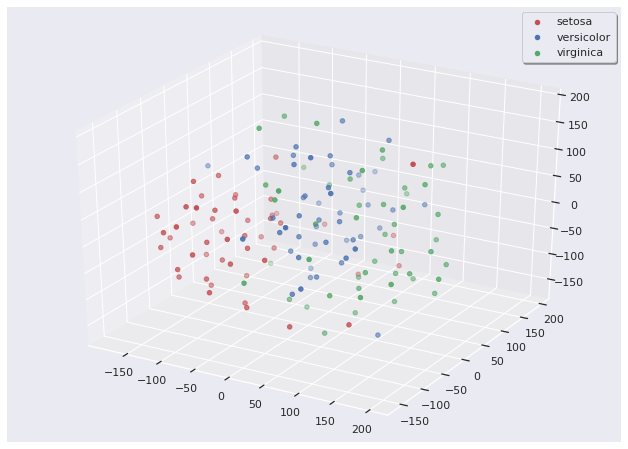

In [115]:
from  mpl_toolkits import mplot3d
tsne = TSNE(n_components=3)
X_tSNE = tsne.fit_transform(x_std)
fig=plt.figure()
ax3d=plt.axes(projection="3d")
target_names_iris=['setosa', 'versicolor', 'virginica']
for i,c,target_name in zip(np.unique(y_iris),['r','b','g'],target_names_iris):
  ax3d.scatter(X_tSNE[y_iris==i,0], X_tSNE[y_iris==i,1],X_tSNE[y_iris==i,2],c=c, label=target_name)
#ax3d.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=y_iris,cmap='viridis')
plt.legend(loc='best',shadow=True)
plt.show()

tsne = TSNE(n_components=3,metric='mahalanobis')
X_tSNE = tsne.fit_transform(x_std)
fig=plt.figure()
ax3d=plt.axes(projection="3d")
for i,c,target_name in zip(np.unique(y_iris),['r','b','g'],target_names_iris):
  ax3d.scatter(X_tSNE[y_iris==i,0], X_tSNE[y_iris==i,1],X_tSNE[y_iris==i,2],c=c, label=target_name)
#ax3d.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=y_iris,cmap='viridis')
plt.legend(loc='best',shadow=True)
plt.show()



['setosa', 'versicolor']


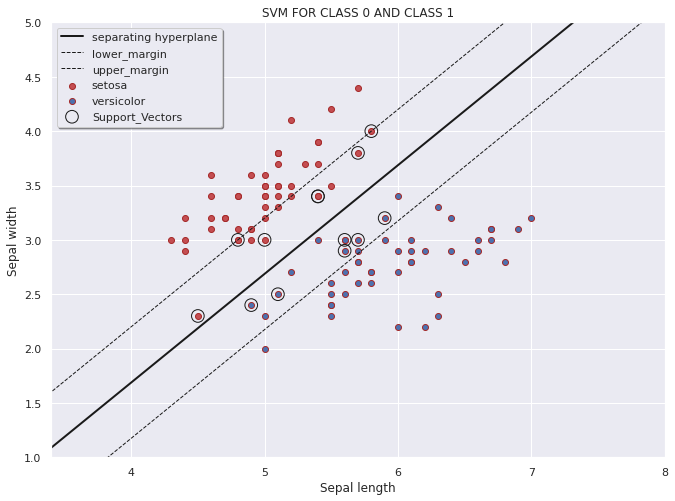

Classification Report for C=1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for C=0.001
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Classification Report for C=1000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
iris_targets=[]
iris_targets.append(myData.target_names[0])
iris_targets.append(myData.target_names[1])
#iris_targets[0]='setosa_Train_Data_Points'
#iris_targets[1]='versicolor_Train_Data_Points'
print(iris_targets)
#df_iris
#myData.data
#print(x_iris)
#print(myData.data)
df_sepal_data=pd.DataFrame(data=x_iris[:,[0,1]],columns=['sepal_length','sepal_width'])
#print(df_sepal_data)
df_sepal_data['target']=myData.target
df_sepal_data01=df_sepal_data.loc[(df_sepal_data['target'].isin([0,1]))]
x_train_sepal,x_test_sepal,y_train_sepal,y_test_sepal=train_test_split(df_sepal_data01.iloc[:,0:2].copy(),df_sepal_data01.iloc[:,2].copy(),test_size=0.3,random_state=32)
x_train_sepal=x_train_sepal.to_numpy()
x_test_sepal=x_test_sepal.to_numpy()
y_train_sepal=y_train_sepal.to_numpy()
y_test_sepal=y_test_sepal.to_numpy()
from sklearn import svm
svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train_sepal,y_train_sepal)
a=svm_model.coef_[0][0]
b=svm_model.coef_[0][1]
c=svm_model.intercept_[0]
x_sepal_cord=np.linspace(-10,10,20)
y_sepal_cord=((-1*c)/b)-(x_sepal_cord*(a/b))
m=1/np.sqrt(np.sum(svm_model.coef_ ** 2))
yy_cord_up=y_sepal_cord+ np.sqrt(1+((a/b)*(a/b)))*m
yy_cord_down=y_sepal_cord - np.sqrt(1+((a/b)*(a/b)))*m
plt.figure()
x_min=x_train_sepal[:,0].min()-1
x_max=x_train_sepal[:,0].max()+1
y_min=x_train_sepal[:,1].min()-1
y_max=x_train_sepal[:,1].max()+1
#plt.svm_model()
plt.plot(x_sepal_cord, y_sepal_cord, 'k-',label='separating hyperplane',linewidth=2)
plt.plot(x_sepal_cord, yy_cord_down, 'k--',label='lower_margin',linewidth=1)
plt.plot(x_sepal_cord, yy_cord_up, 'k--',label='upper_margin',linewidth=1)
#plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],c='orange',label='Support_Vectors')
for i,c,target_name in zip(np.unique(y_train_sepal),['r','b'],iris_targets):
    plt.scatter(x_train_sepal[y_train_sepal==i,0], x_train_sepal[y_train_sepal==i,1],c=c, label=target_name,edgecolors='brown') 

#iris_targets[0]='setosa_Test_Data_Points'
#iris_targets[1]='versicolor_Train_Data_Points'
for i,c in zip(np.unique(y_test_sepal),['r','b']):
    plt.scatter(x_test_sepal[y_test_sepal==i,0], x_test_sepal[y_test_sepal==i,1],c=c,edgecolors='brown') 

plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],s=160,facecolors='none',label='Support_Vectors',edgecolors='k')
plt.legend(loc='best',shadow=True)
plt.title('SVM FOR CLASS 0 AND CLASS 1')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
y_pred_sepal=svm_model.predict(x_test_sepal)
print("Classification Report for C=1")
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=0.001")
svm_model=svm.SVC(kernel='linear',C=0.001)
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=1000")
svm_model=svm.SVC(kernel='linear',C=1000)
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))

['versicolor', 'virginica']


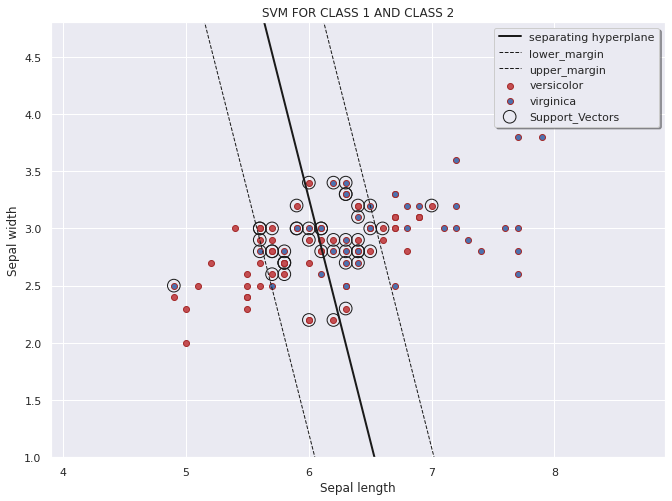

Classification Report for C=1
              precision    recall  f1-score   support

  versicolor       0.83      0.53      0.65        19
   virginica       0.50      0.82      0.62        11

    accuracy                           0.63        30
   macro avg       0.67      0.67      0.63        30
weighted avg       0.71      0.63      0.64        30

Classification Report for C=0.001
              precision    recall  f1-score   support

  versicolor       0.00      0.00      0.00        19
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Classification Report for C=1000
              precision    recall  f1-score   support

  versicolor       0.82      0.47      0.60        19
   virginica       0.47      0.82      0.60        11

    accuracy                           0.60        30
   macro avg       0.65      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
iris_targets=[]
iris_targets.append(myData.target_names[1])
iris_targets.append(myData.target_names[2])
#iris_targets[0]='setosa_Train_Data_Points'
#iris_targets[1]='versicolor_Train_Data_Points'
print(iris_targets)
#df_iris
#myData.data
#print(x_iris)
#print(myData.data)
df_sepal_data=pd.DataFrame(data=x_iris[:,[0,1]],columns=['sepal_length','sepal_width'])
#print(df_sepal_data)
df_sepal_data['target']=myData.target
df_sepal_data12=df_sepal_data.loc[(df_sepal_data['target'].isin([1,2]))]
x_train_sepal,x_test_sepal,y_train_sepal,y_test_sepal=train_test_split(df_sepal_data12.iloc[:,0:2].copy(),df_sepal_data12.iloc[:,2].copy(),test_size=0.3,random_state=32)
x_train_sepal=x_train_sepal.to_numpy()
x_test_sepal=x_test_sepal.to_numpy()
y_train_sepal=y_train_sepal.to_numpy()
y_test_sepal=y_test_sepal.to_numpy()
from sklearn import svm
svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train_sepal,y_train_sepal)
a=svm_model.coef_[0][0]
b=svm_model.coef_[0][1]
c=svm_model.intercept_[0]
x_sepal_cord=np.linspace(-10,10,20)
y_sepal_cord=((-1*c)/b)-(x_sepal_cord*(a/b))
m=1/np.sqrt(np.sum(svm_model.coef_ ** 2))
yy_cord_up=y_sepal_cord+ np.sqrt(1+((a/b)*(a/b)))*m
yy_cord_down=y_sepal_cord - np.sqrt(1+((a/b)*(a/b)))*m
plt.figure()
#plt.svm_model()
x_min=x_train_sepal[:,0].min()-1
x_max=x_train_sepal[:,0].max()+1
y_min=x_train_sepal[:,1].min()-1
y_max=x_train_sepal[:,1].max()+1
plt.plot(x_sepal_cord, y_sepal_cord, 'k-',label='separating hyperplane',linewidth=2)
plt.plot(x_sepal_cord, yy_cord_down, 'k--',label='lower_margin',linewidth=1)
plt.plot(x_sepal_cord, yy_cord_up, 'k--',label='upper_margin',linewidth=1)
#plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],c='orange',label='Support_Vectors')
for i,c,target_name in zip(np.unique(y_train_sepal),['r','b'],iris_targets):
    plt.scatter(x_train_sepal[y_train_sepal==i,0], x_train_sepal[y_train_sepal==i,1],c=c, label=target_name,edgecolors='brown') 

#iris_targets[0]='setosa_Test_Data_Points'
#iris_targets[1]='versicolor_Train_Data_Points'
for i,c in zip(np.unique(y_test_sepal),['r','b']):
    plt.scatter(x_test_sepal[y_test_sepal==i,0], x_test_sepal[y_test_sepal==i,1],c=c,edgecolors='brown') 

plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],s=160,facecolors='none',label='Support_Vectors',edgecolors='k')
plt.legend(loc='best',shadow=True)
plt.title('SVM FOR CLASS 1 AND CLASS 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
y_pred_sepal=svm_model.predict(x_test_sepal)
print("Classification Report for C=1")
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=0.001")
svm_model=svm.SVC(kernel='linear',C=0.001)
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=1000")
svm_model=svm.SVC(kernel='linear',C=1000)
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))



['setosa', 'virginica']


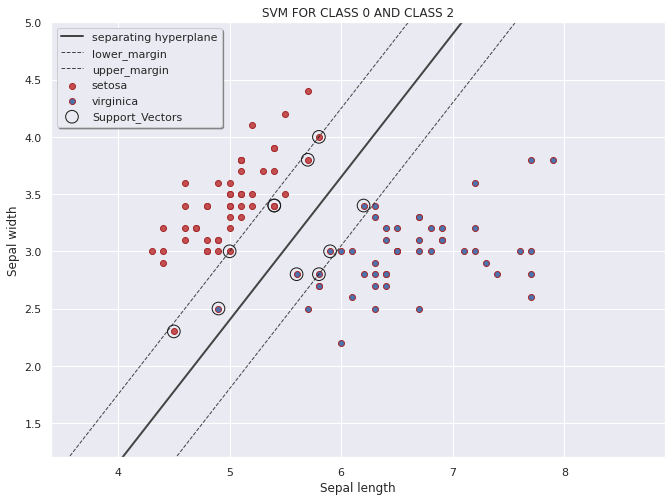

Classification Report for C=1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for C=0.001
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Classification Report for C=1000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
iris_targets=[]
iris_targets.append(myData.target_names[0])
iris_targets.append(myData.target_names[2])
#iris_targets[0]='setosa_Train_Data_Points'
#iris_targets[1]='versicolor_Train_Data_Points'
print(iris_targets)
#df_iris
#myData.data
#print(x_iris)
#print(myData.data)
df_sepal_data=pd.DataFrame(data=x_iris[:,[0,1]],columns=['sepal_length','sepal_width'])
#print(df_sepal_data)
df_sepal_data['target']=myData.target
df_sepal_data02=df_sepal_data.loc[(df_sepal_data['target'].isin([0,2]))]
x_train_sepal,x_test_sepal,y_train_sepal,y_test_sepal=train_test_split(df_sepal_data02.iloc[:,0:2].copy(),df_sepal_data02.iloc[:,2].copy(),test_size=0.3,random_state=32)
x_train_sepal=x_train_sepal.to_numpy()
x_test_sepal=x_test_sepal.to_numpy()
y_train_sepal=y_train_sepal.to_numpy()
y_test_sepal=y_test_sepal.to_numpy()
from sklearn import svm
svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train_sepal,y_train_sepal)
a=svm_model.coef_[0][0]
b=svm_model.coef_[0][1]
c=svm_model.intercept_[0]
x_sepal_cord=np.linspace(-10,10,20)
y_sepal_cord=((-1*c)/b)-(x_sepal_cord*(a/b))
m=1/np.sqrt(np.sum(svm_model.coef_ ** 2))
yy_cord_up=y_sepal_cord+ np.sqrt(1+((a/b)*(a/b)))*m
yy_cord_down=y_sepal_cord - np.sqrt(1+((a/b)*(a/b)))*m
plt.figure()

plt.plot(x_sepal_cord, y_sepal_cord, 'k-',label='separating hyperplane',linewidth=2,alpha=0.8)
plt.plot(x_sepal_cord, yy_cord_down, 'k--',label='lower_margin',linewidth=1,alpha=0.8)
plt.plot(x_sepal_cord, yy_cord_up, 'k--',label='upper_margin',linewidth=1,alpha=0.8)
#plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],c='orange',label='Support_Vectors')
for i,c,target_name in zip(np.unique(y_train_sepal),['r','b'],iris_targets):
    plt.scatter(x_train_sepal[y_train_sepal==i,0], x_train_sepal[y_train_sepal==i,1],c=c, label=target_name,edgecolors='brown') 

#iris_targets[0]='setosa_Test_Data_Points'
#iris_targets[1]='versicolor_Train_Data_Points'
x_min=x_train_sepal[:,0].min()-1
x_max=x_train_sepal[:,0].max()+1
y_min=x_train_sepal[:,1].min()-1
y_max=x_train_sepal[:,1].max()+1
for i,c in zip(np.unique(y_test_sepal),['r','b']):
    plt.scatter(x_test_sepal[y_test_sepal==i,0], x_test_sepal[y_test_sepal==i,1],c=c,edgecolors='brown') 

plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1],s=160,facecolors='none',label='Support_Vectors',edgecolors='k')
plt.legend(loc='best',shadow=True)
plt.title('SVM FOR CLASS 0 AND CLASS 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
y_pred_sepal=svm_model.predict(x_test_sepal)
print("Classification Report for C=1")
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=0.001")
svm_model=svm.SVC(kernel='linear',C=0.001)
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=1000")
svm_model=svm.SVC(kernel='linear',C=1000)
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


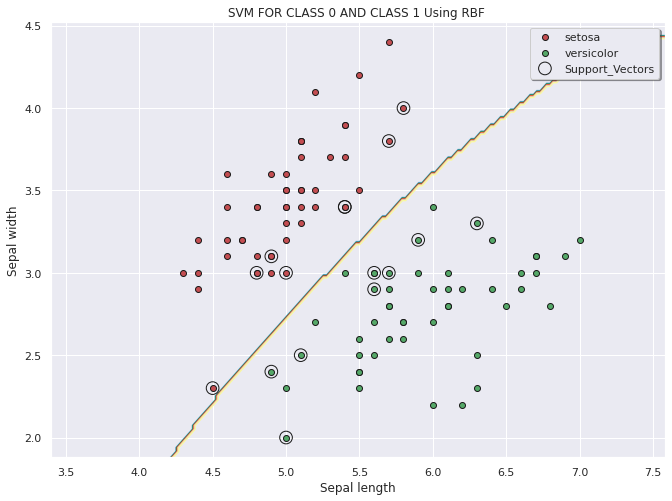

Classification Report for C=1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for C=0.001
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Classification Report for C=1000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
from sklearn import svm
df_sepal_data01=df_sepal_data.loc[(df_sepal_data['target'].isin([0,1]))]
x_train_sepal,x_test_sepal,y_train_sepal,y_test_sepal=train_test_split(df_sepal_data01.iloc[:,0:2].copy(),df_sepal_data01.iloc[:,2].copy(),test_size=0.3,random_state=32)
x_train_sepal=x_train_sepal.to_numpy()
x_test_sepal=x_test_sepal.to_numpy()
y_train_sepal=y_train_sepal.to_numpy()
y_test_sepal=y_test_sepal.to_numpy()
svm_model = svm.SVC(kernel='rbf', gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)

    
plt.figure()

iris_targets=[]
iris_targets.append(myData.target_names[0])
iris_targets.append(myData.target_names[1])              

for i,c,target_name in zip(np.unique(y_train_sepal),['r','g'],iris_targets):
    plt.scatter(x_train_sepal[y_train_sepal==i,0], x_train_sepal[y_train_sepal==i,1],c=c, zorder=10,label=target_name,edgecolors='k')
                
for i,c,target_name in zip(np.unique(y_test_sepal),['r','g'],iris_targets):
    plt.scatter(x_test_sepal[y_test_sepal==i,0], x_test_sepal[y_test_sepal==i,1],c=c,zorder=10,edgecolors='k')
plt.axis('tight')


x_min, x_max = x_train_sepal[:, 0].min()-1, x_test_sepal[:, 0].max()+1 
y_min, y_max = x_train_sepal[:, 1].min()-1, x_train_sepal[:, 1].max()+1
jump = (x_max / x_min)/100
xx_fun, yy_fun = np.meshgrid(np.arange(x_min, x_max, jump),
np.arange(y_min, y_max, jump))
plt.subplot(1, 1, 1)
Z_fun = svm_model.predict(np.c_[xx_fun.ravel(), yy_fun.ravel()])
Z_fun = Z_fun.reshape(xx_fun.shape)
plt.contour(xx_fun, yy_fun, Z_fun, cmap=plt.cm.Paired, alpha=0.9)

plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=160,facecolors='none',label='Support_Vectors', zorder=10, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx_fun.min(), xx_fun.max())
plt.legend(loc='best',shadow=True)
plt.title('SVM FOR CLASS 0 AND CLASS 1 Using RBF ')

plt.show()
y_pred_sepal=svm_model.predict(x_test_sepal)
print("Classification Report for C=1")
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=0.001")
svm_model=svm.SVC(kernel='rbf',C=0.001,gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=1000")
svm_model=svm.SVC(kernel='rbf',C=1000,gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


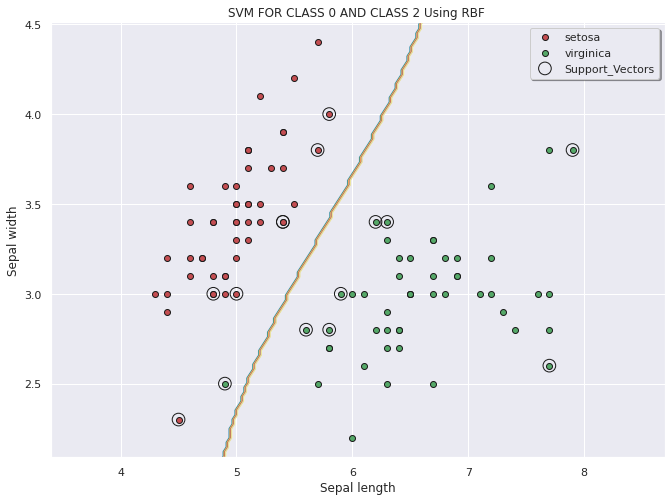

Classification Report for C=1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for C=0.001
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Classification Report for C=1000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
df_sepal_data02=df_sepal_data.loc[(df_sepal_data['target'].isin([0,2]))]
x_train_sepal,x_test_sepal,y_train_sepal,y_test_sepal=train_test_split(df_sepal_data02.iloc[:,0:2].copy(),df_sepal_data02.iloc[:,2].copy(),test_size=0.3,random_state=32)
x_train_sepal=x_train_sepal.to_numpy()
x_test_sepal=x_test_sepal.to_numpy()
y_train_sepal=y_train_sepal.to_numpy()
y_test_sepal=y_test_sepal.to_numpy()
svm_model = svm.SVC(kernel='rbf', gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)

   
plt.figure()

iris_targets=[]
iris_targets.append(myData.target_names[0])
iris_targets.append(myData.target_names[2])              

for i,c,target_name in zip(np.unique(y_train_sepal),['r','g'],iris_targets):
    plt.scatter(x_train_sepal[y_train_sepal==i,0], x_train_sepal[y_train_sepal==i,1],c=c, zorder=10,label=target_name,edgecolors='k')
                
for i,c,target_name in zip(np.unique(y_test_sepal),['r','g'],iris_targets):
    plt.scatter(x_test_sepal[y_test_sepal==i,0], x_test_sepal[y_test_sepal==i,1],c=c,zorder=10,edgecolors='k')
plt.axis('tight')

x_min, x_max = x_train_sepal[:, 0].min()-1, x_test_sepal[:, 0].max()+1 
y_min, y_max = x_train_sepal[:, 1].min()-1, x_train_sepal[:, 1].max()+1
jump = (x_max / x_min)/100
xx_fun, yy_fun = np.meshgrid(np.arange(x_min, x_max, jump),
np.arange(y_min, y_max, jump))
plt.subplot(1, 1, 1)
Z_fun = svm_model.predict(np.c_[xx_fun.ravel(), yy_fun.ravel()])
Z_fun = Z_fun.reshape(xx_fun.shape)
plt.contour(xx_fun, yy_fun, Z_fun, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=160,facecolors='none',label='Support_Vectors', zorder=10, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx_fun.min(), xx_fun.max())
plt.legend(loc='best',shadow=True)
plt.title('SVM FOR CLASS 0 AND CLASS 2 Using RBF ')

plt.show()
y_pred_sepal=svm_model.predict(x_test_sepal)
print("Classification Report for C=1")
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=0.001")
svm_model=svm.SVC(kernel='rbf',C=0.001,gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=1000")
svm_model=svm.SVC(kernel='rbf',C=1000,gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


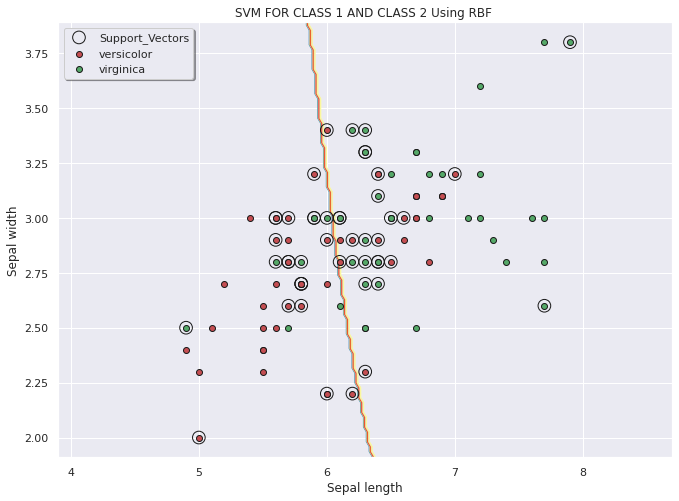

Classification Report for C=1
              precision    recall  f1-score   support

  versicolor       0.82      0.47      0.60        19
   virginica       0.47      0.82      0.60        11

    accuracy                           0.60        30
   macro avg       0.65      0.65      0.60        30
weighted avg       0.69      0.60      0.60        30

Classification Report for C=0.001
              precision    recall  f1-score   support

  versicolor       0.00      0.00      0.00        19
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30

Classification Report for C=1000
              precision    recall  f1-score   support

  versicolor       0.78      0.37      0.50        19
   virginica       0.43      0.82      0.56        11

    accuracy                           0.53        30
   macro avg       0.60      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
df_sepal_data12=df_sepal_data.loc[(df_sepal_data['target'].isin([1,2]))]
x_train_sepal,x_test_sepal,y_train_sepal,y_test_sepal=train_test_split(df_sepal_data12.iloc[:,0:2].copy(),df_sepal_data12.iloc[:,2].copy(),test_size=0.3,random_state=32)
x_train_sepal=x_train_sepal.to_numpy()
x_test_sepal=x_test_sepal.to_numpy()
y_train_sepal=y_train_sepal.to_numpy()
y_test_sepal=y_test_sepal.to_numpy()
svm_model = svm.SVC(kernel='rbf', gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)

    
plt.figure()


plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=160,facecolors='none',label='Support_Vectors' ,zorder=10, edgecolors='k')
iris_targets=[]
iris_targets.append(myData.target_names[1])
iris_targets.append(myData.target_names[2])              

for i,c,target_name in zip(np.unique(y_train_sepal),['r','g'],iris_targets):
    plt.scatter(x_train_sepal[y_train_sepal==i,0], x_train_sepal[y_train_sepal==i,1],c=c, zorder=10,label=target_name,edgecolors='k')
                
for i,c,target_name in zip(np.unique(y_test_sepal),['r','g'],iris_targets):
    plt.scatter(x_test_sepal[y_test_sepal==i,0], x_test_sepal[y_test_sepal==i,1],c=c,zorder=10,edgecolors='k')
plt.axis('tight')


x_min, x_max = x_train_sepal[:, 0].min()-1, x_test_sepal[:, 0].max()+1 
y_min, y_max = x_train_sepal[:, 1].min()-1, x_train_sepal[:, 1].max()+1
jump= (x_max / x_min)/100
xx_fun, yy_fun = np.meshgrid(np.arange(x_min, x_max, jump),
np.arange(y_min, y_max, jump))
plt.subplot(1, 1, 1)
Z_fun = svm_model.predict(np.c_[xx_fun.ravel(), yy_fun.ravel()])
Z_fun = Z_fun.reshape(xx_fun.shape)
plt.contour(xx_fun, yy_fun, Z_fun, cmap=plt.cm.Paired, alpha=0.9)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx_fun.min(), xx_fun.max())
plt.legend(loc='best',shadow=True)
plt.title('SVM FOR CLASS 1 AND CLASS 2 Using RBF ')

plt.show()
y_pred_sepal=svm_model.predict(x_test_sepal)
print("Classification Report for C=1")
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=0.001")
svm_model=svm.SVC(kernel='rbf',C=0.001,gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))
print("Classification Report for C=1000")
svm_model=svm.SVC(kernel='rbf',C=1000,gamma='auto')
svm_model.fit(x_train_sepal,y_train_sepal)
y_pred_sepal=svm_model.predict(x_test_sepal)
print(classification_report(y_test_sepal,y_pred_sepal,target_names=iris_targets))